In [1]:
import numpy as np
import os
import sys
import random
import torch
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path+"/models")
sys.path.append(module_path+"/train")
sys.path.append(module_path+"/datasets")

from datasets import train_test_random_split, load_dsprites, CustomDSpritesDataset
from entanglement_metric import entanglement_metric_factor_vae, entanglement_metric_beta_vae
from utils import latent_transversal
from beta_vae import Classifier

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
device.type

'cpu'

In [3]:
dataset = load_dsprites("../datasets/dsprites.npz",False)

In [4]:
data_ = CustomDSpritesDataset(dataset)

In [5]:
model_names = [f for f in os.listdir('trained_models') if f[-4:] =='.dat']
model_names

['betavae_beta1_e40_alldata.dat',
 'betavae_beta4_e100_alldata.dat',
 'model_beta1_e40_alldata_n.dat',
 'factorvae_epochs20_gamma100_lrvae0.01_lrd5e-05.dat',
 'factorvae_epochs20_gamma30_lrvae0.01_lrd1e-05.dat',
 'model_beta1_e100_alldata_n.dat',
 'factorvae_epochs50_gamma50_lrvae0.01_lrd1e-05.dat',
 'controlvae_epoch50_lr1e2_Cmax10.dat',
 'controlvae_epoch50_lr1e2_Cmax8.dat',
 'controlvae_e50_lr1e2_Cmax12.dat',
 'betavae_beta4_e40_alldata.dat']

In [6]:
def plot_loss(loss_lists, title):
    if not isinstance(loss_lists[0], list):
        loss_lists = [loss_lists]
    for loss_list in loss_lists:
        plt.plot(np.arange(1,len(loss_list)+1, 1), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training "+title)
    plt.show()

model 1: betavae_beta1_e40_alldata.dat
[0.49333333333333335, 0.5266666666666666, 0.51, 0.47333333333333333, 0.5166666666666667]
[[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
  [ 2.  10.6  6.   3.6  5.2 10.   3.2  3.6  7.8  7. ]
  [ 0.2  1.2 12.   0.2 39.8  1.   1.6  0.2  3.2  0.8]
  [ 9.   4.6  1.8  4.8  5.4  5.8  3.6  9.4  3.8 15. ]
  [ 0.6  0.  11.   0.   0.   0.  15.8  4.4  0.2 32.4]
  [48.6  0.   0.   0.   0.   0.   2.2  0.   0.   2.4]]]
Factor Vae metric: 
Accuracy: 0.496
Beta Vae metric: 
Accuracy: 0.606


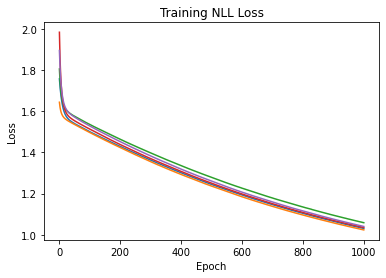

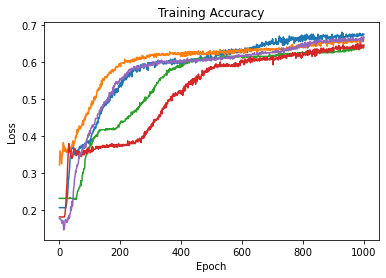

model 2: betavae_beta4_e100_alldata.dat
[0.5666666666666667, 0.5433333333333333, 0.5933333333333334, 0.5933333333333334, 0.5766666666666667]
[[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
  [14.6 25.2  0.   0.2  0.4  7.   0.4  3.6  4.6  0. ]
  [ 4.8 14.  10.   7.2  2.4  1.2 11.4  2.4  2.4  5.6]
  [21.2  6.   2.6  2.  12.8  3.8  3.2  3.8  6.2  1. ]
  [ 0.   0.   6.   0.   6.  26.6  0.2  8.6  8.4  0. ]
  [ 0.   0.   0.   0.   4.4 19.   0.   2.2 38.6  0. ]]]
Factor Vae metric: 
Accuracy: 0.42533333333333334
Beta Vae metric: 
Accuracy: 0.5619999999999999


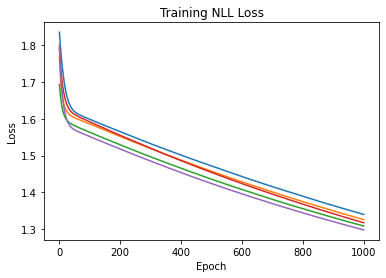

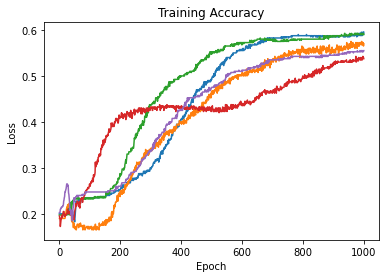

model 3: model_beta1_e40_alldata_n.dat
[0.15666666666666668, 0.12, 0.18, 0.16, 0.13333333333333333]
[[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
  [ 0.   0.   0.  40.6  0.   0.  18.6  2.4  0.   0. ]
  [ 0.   0.   0.   0.   0.   0.  65.   0.   0.   0. ]
  [ 2.4  0.4  0.4 31.   0.6  1.   0.4  0.8  0.8 16.8]
  [ 0.   0.   0.   0.   0.   0.   0.   0.  56.   0.8]
  [ 0.   0.   0.   0.   0.   0.   0.  62.   0.   0. ]]]
Factor Vae metric: 
Accuracy: 0.85
Beta Vae metric: 
Accuracy: 0.78


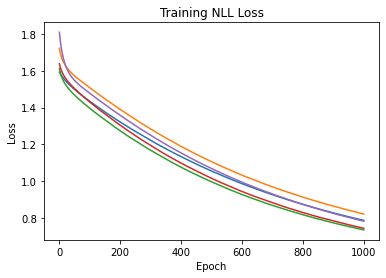

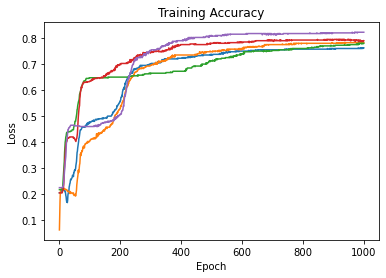

model 4: factorvae_epochs20_gamma100_lrvae0.01_lrd5e-05.dat
[0.44, 0.48, 0.45666666666666667, 0.4266666666666667, 0.4766666666666667]
[[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
  [ 1.   3.  12.2  2.4  0.6 30.6  2.   1.  13.6  0.4]
  [ 2.8 21.6 13.   2.4  9.2  0.4  3.4  0.4  4.   1.8]
  [ 3.   4.6 10.8  8.6  3.   5.2  2.   6.6  9.6  3.6]
  [ 0.   0.  38.8  4.4  0.2  0.   0.  15.   0.   0. ]
  [ 0.   0.   0.   0.   0.   0.   0.   0.  58.8  0. ]]]
Factor Vae metric: 
Accuracy: 0.544
Beta Vae metric: 
Accuracy: 0.63


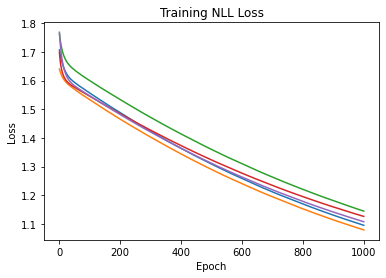

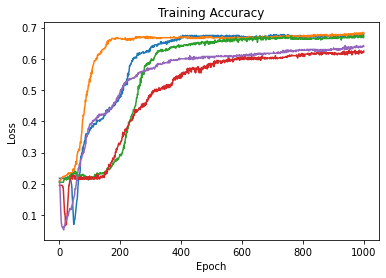

model 5: factorvae_epochs20_gamma30_lrvae0.01_lrd1e-05.dat
[0.35, 0.44333333333333336, 0.35, 0.39666666666666667, 0.37]
[[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
  [ 4.4 11.6 29.8  0.2  4.6  0.2  3.4  0.4 10.4  0. ]
  [12.6  1.8  4.2  3.8  0.8  5.2  1.2  8.8 17.6  3.6]
  [ 1.6  7.4 20.8  2.6  4.8  2.2  4.4  3.8  4.4  3.8]
  [ 0.8  0.   0.   0.   0.4  0.   0.   0.  55.4  0. ]
  [ 0.   0.   0.   0.  61.8  0.   0.   0.   1.2  0. ]]]
Factor Vae metric: 
Accuracy: 0.618
Beta Vae metric: 
Accuracy: 0.6379999999999999


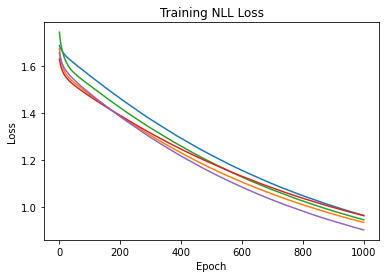

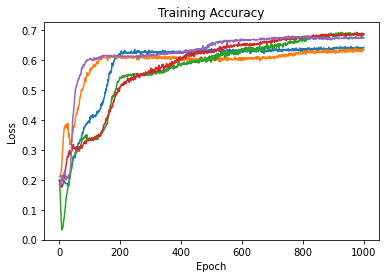

model 6: model_beta1_e100_alldata_n.dat
[0.15, 0.17666666666666667, 0.16666666666666666, 0.24, 0.21]
[[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
  [ 0.   0.   0.  39.   0.   0.  21.2  1.2  0.   0.6]
  [ 0.   0.   0.   0.   0.   0.  58.2  0.   0.   0. ]
  [ 1.6  0.4  2.  34.4  1.   1.6  1.2  1.8  1.  19.2]
  [ 0.   0.   0.   0.   0.   0.   0.   0.  55.2  3.8]
  [ 0.   0.   0.   0.   0.   0.   0.  56.6  0.   0. ]]]
Factor Vae metric: 
Accuracy: 0.8113333333333334
Beta Vae metric: 
Accuracy: 0.8119999999999999


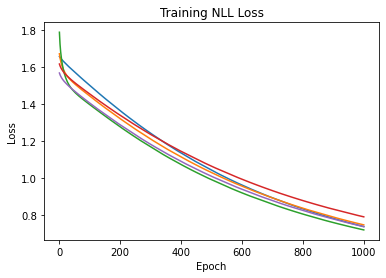

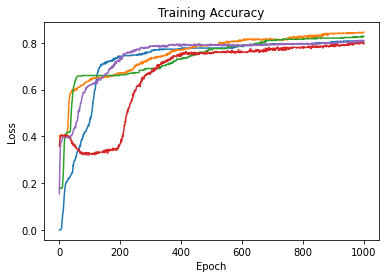

model 7: factorvae_epochs50_gamma50_lrvae0.01_lrd1e-05.dat
[0.38666666666666666, 0.32666666666666666, 0.35333333333333333, 0.31, 0.37]
[[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
  [ 1.2  0.   0.4 41.4  0.2  0.8  2.8  0.2  5.8  8.4]
  [ 0.   0.   0.   0.   0.  53.6  0.   0.   2.2  2.8]
  [ 2.   8.6  3.2 11.2  2.   2.2  6.8  3.  15.   9. ]
  [ 0.   2.   0.2  0.   0.6  0.   0.   0.  47.2 11.6]
  [ 0.  11.   0.   0.   0.   0.   0.   0.   7.6 37. ]]]
Factor Vae metric: 
Accuracy: 0.6506666666666667
Beta Vae metric: 
Accuracy: 0.692


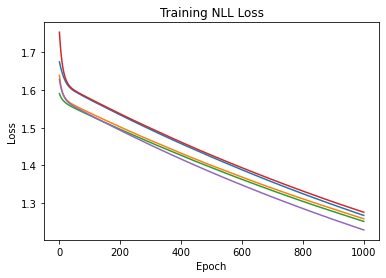

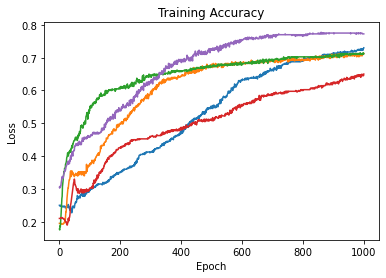

model 8: controlvae_epoch50_lr1e2_Cmax10.dat
[0.48, 0.45, 0.4, 0.51, 0.48]
[[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
  [29.6  0.   0.   0.   5.2 25.2  0.   1.6  0.2  0. ]
  [ 1.2  7.  12.8  5.2  4.8  9.6 10.   2.6  1.   2. ]
  [ 4.   2.6  4.2  4.8  6.8 16.2  8.   6.   4.4  4.8]
  [ 0.   0.   0.  17.6  0.   0.  43.2  0.   0.   0. ]
  [ 0.   0.   0.   1.6  0.   0.   0.2 57.6  0.   0. ]]]
Factor Vae metric: 
Accuracy: 0.5359999999999999
Beta Vae metric: 
Accuracy: 0.612


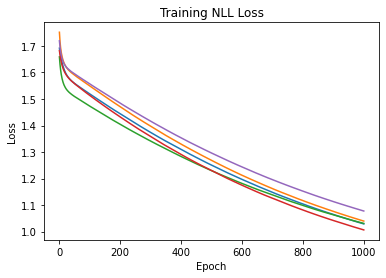

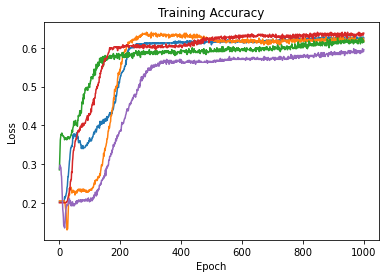

model 9: controlvae_epoch50_lr1e2_Cmax8.dat
[0.51, 0.5266666666666666, 0.5166666666666667, 0.49666666666666665, 0.5233333333333333]
[[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
  [23.8  0.4  0.4  5.8  7.   4.4 18.4  0.4  0.2  0.8]
  [ 5.6  6.6  4.8  5.   9.   1.8  5.   6.4  6.   4.8]
  [14.8  1.8  5.   6.   4.6  2.4 13.2  2.6  4.2  2.2]
  [ 0.   0.   0.   7.2 52.8  1.8  0.   0.   0.   0. ]
  [ 0.   0.   0.  40.   0.  24.8  0.   0.   0.   0. ]]]
Factor Vae metric: 
Accuracy: 0.4853333333333334
Beta Vae metric: 
Accuracy: 0.6359999999999999


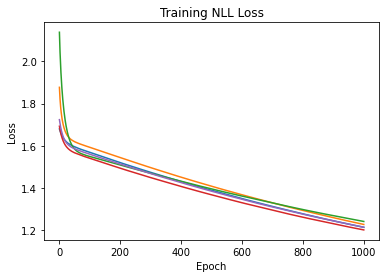

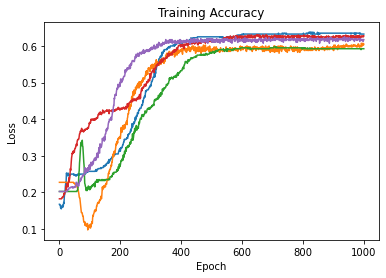

model 10: controlvae_e50_lr1e2_Cmax12.dat
[0.6366666666666667, 0.6366666666666667, 0.62, 0.69, 0.57]
[[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
  [ 3.   5.8  0.  22.6  0.4  0.8  2.6  0.8 11.   9.8]
  [ 2.   2.8  9.6 13.   3.8  5.   4.6 11.   7.   2.2]
  [ 3.4  9.8  2.4  3.8  1.4  2.6 10.4  3.2 13.4  3.2]
  [11.8 25.4  0.   0.   0.   0.2  0.8  0.   0.  32.4]
  [17.4 26.4  0.   0.   0.   0.   8.6  0.   3.6  2. ]]]
Factor Vae metric: 
Accuracy: 0.3693333333333333
Beta Vae metric: 
Accuracy: 0.404


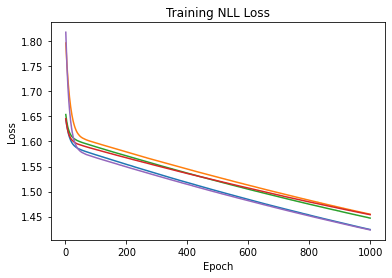

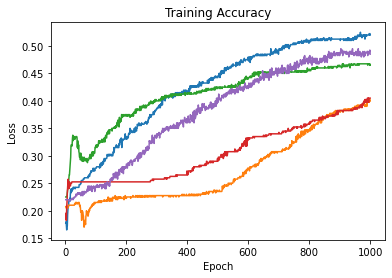

model 11: betavae_beta4_e40_alldata.dat
[0.51, 0.49666666666666665, 0.49333333333333335, 0.5166666666666667, 0.4766666666666667]
[[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
  [ 0.2  0.4 21.6 21.2  1.2 13.4  0.   1.   0.4  1.8]
  [ 2.8 14.   7.4  6.   1.4 10.4  6.6  2.   1.6  6.6]
  [ 1.4  1.4 23.   7.4  2.8 17.   1.4  0.8  0.6  7.6]
  [ 0.   0.   0.   0.  35.6  0.   0.  27.4  0.   0. ]
  [ 0.   0.   0.   0.   0.   0.   0.   0.  53.6  0. ]]]
Factor Vae metric: 
Accuracy: 0.5013333333333334
Beta Vae metric: 
Accuracy: 0.608


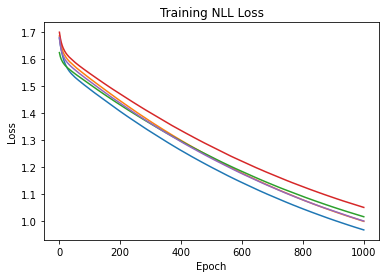

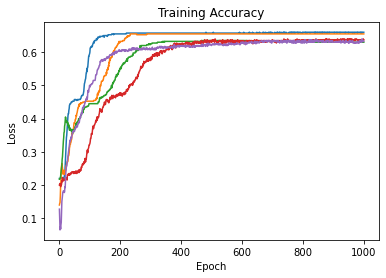

In [7]:
i=1
for name in model_names:
    model = torch.load('trained_models/'+name, map_location=device)
    print("model "+str(i)+": "+name)
    loss = entanglement_metric_factor_vae(model, data_, 300, 200, random_seeds=5)
    print("Factor Vae metric: ")
    print("Accuracy: "+str(1-loss))
    print("Beta Vae metric: ")
    classifier = Classifier()
    optimizer = torch.optim.Adagrad(classifier.parameters(), lr=1e-2)
    train_losses, train_accuracies, test_accuracy = entanglement_metric_beta_vae(model, classifier, optimizer, 1000,  data_, 500, 50, random_seeds=5)
    print("Accuracy: "+str(test_accuracy))
    plot_loss(train_losses, "NLL Loss")
    plot_loss(train_accuracies, "Accuracy")
    i+=1

In [11]:
print(data_.factors_names)

(b'color', b'shape', b'scale', b'orientation', b'posX', b'posY')


In [20]:
imgs = latent_transversal(model0,data_[10][0].float(),-3,3,10,7)

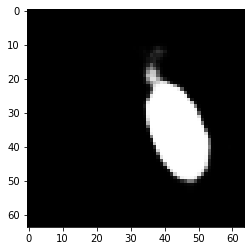

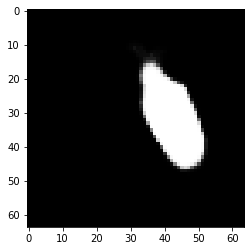

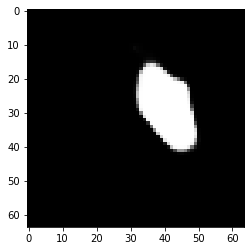

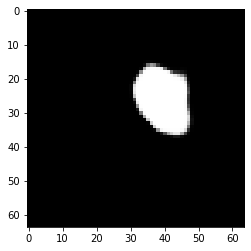

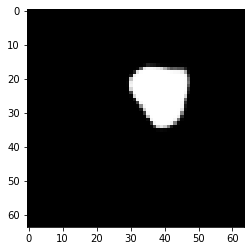

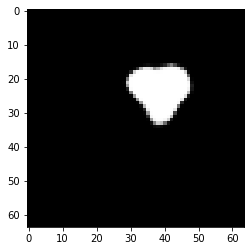

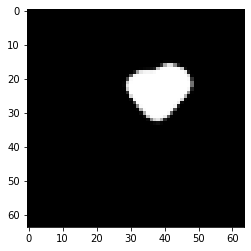

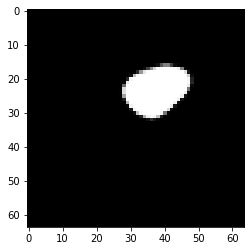

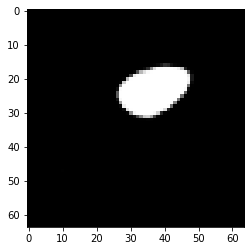

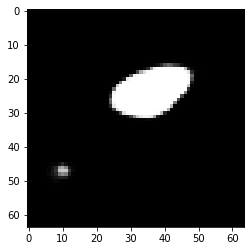

In [21]:
for img in imgs:
    plt.imshow(torch.sigmoid(img.squeeze().detach()), cmap='Greys_r')
    plt.title("")
    plt.show()